# Boost Converter oefening 3

In [1]:
from cursusdef import *

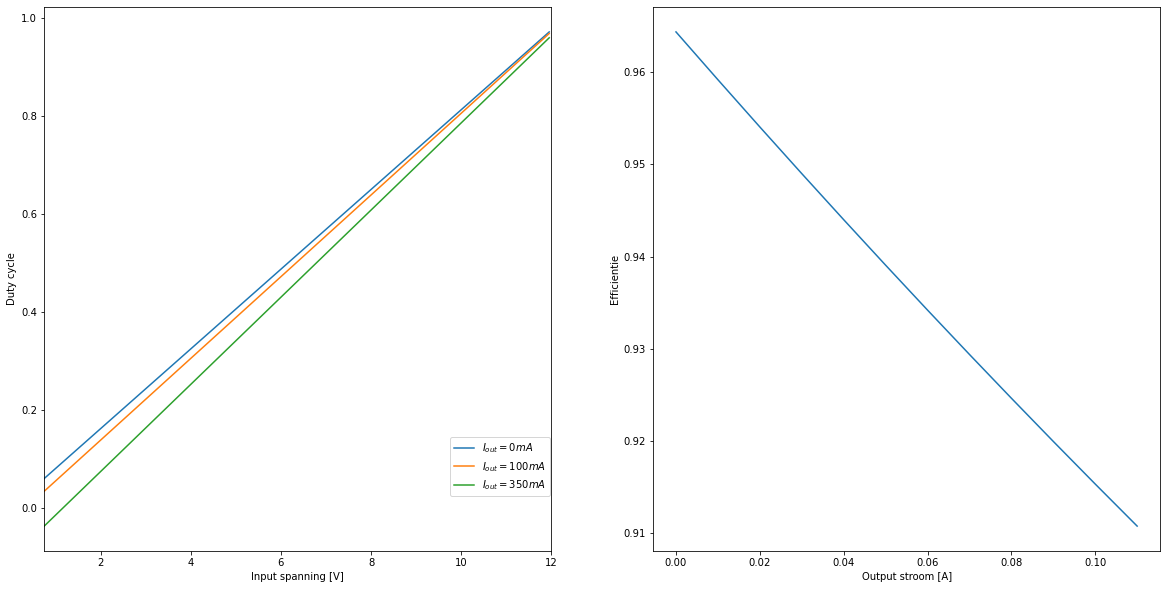

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def step_up_vout(vin,D,Iout=0,RT=0,RL=0,VD=0.3):
    D1=1-D
    return vin/D1-RL*Iout/D1/D1-D/D1/D1*RT*Iout-VD

def step_up_mu(vin,D,Iout=0,RT=0,RL=0,VD=0.3):
    D1=1-D
    return 1-RL*Iout/D1/vin-D/D1/vin*RT*Iout-D1*VD/vin

def step_up_duty(vin,vout,IL=0,RT=0,RL=0,VD=0.3):
    mT=(vout+VD+RL*IL-vin)/(vin-RL*IL-RT*IL)+1 # T_off/T_on
    return 1/mT

def step_up_vin(vout,D,Iout=0,RT=0,RL=0,VD=0.3):
    D1=1-D
    IL=Iout/D1
    return (vout+VD)*D1+RL*IL+RT*D*IL
    

figure, ax = plt.subplots(1,2,figsize=(20, 10))
vin=np.arange(0.75,12,0.05)
iout=np.arange(0,0.12,0.01)

ax[0].plot(vin,step_up_duty(vin,12,IL=0,RT=3,RL=0.3,VD=0.3), label=r'$I_{out}= 0 mA$')
ax[0].plot(vin,step_up_duty(vin,12,IL=0.1,RT=3,RL=0.3,VD=0.3),label=r'$I_{out}= 100 mA$')
ax[0].plot(vin,step_up_duty(vin,12,IL=0.35,RT=3,RL=0.3,VD=0.3),label=r'$I_{out}= 350 mA$')

ax[1].plot(iout,step_up_mu(5,step_up_duty(5,12,IL=iout,RT=3,RL=0.3,VD=0.3),Iout=iout,RT=3,RL=0.3,VD=0.3))

ax[0].legend( loc=(.8,.1))
ax[0].set_xlim(0.75,12)
ax[0].set_xlabel('Input spanning [V]')
ax[0].set_ylabel('Duty cycle')
ax[1].set_xlabel('Output stroom [A]')
ax[1].set_ylabel('Efficientie');

In [8]:
for D in [0.0,0.1,0.3,0.5,0.7,0.9]:
    print(D,step_up_vin(12,D,Iout=0,RT=3,RL=0.3,VD=0.3),step_up_vin(12,D,Iout=0.1,RT=3,RL=0.3,VD=0.3),step_up_vin(12,D,Iout=0.35,RT=3,RL=0.3,VD=0.3))

0.0 12.3 12.33 12.405000000000001
0.1 11.07 11.136666666666667 11.303333333333335
0.3 8.61 8.78142857142857 9.209999999999999
0.5 6.15 6.51 7.41
0.7 3.690000000000001 4.490000000000001 6.49
0.9 1.2299999999999998 4.23 11.73


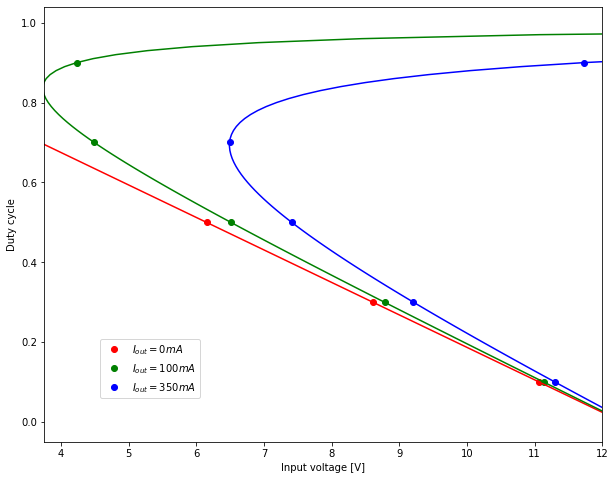

In [19]:
D1=[0.0,0.1,0.3,0.5,0.7,0.9]
A1=[step_up_vin(12,D,Iout=0,RT=3,RL=0.3,VD=0.3) for D in D1]
A2=[step_up_vin(12,D,Iout=0.1,RT=3,RL=0.3,VD=0.3) for D in D1]
A3=[step_up_vin(12,D,Iout=0.35,RT=3,RL=0.3,VD=0.3) for D in D1]
D2=[x/100 for x in range(100)]
b1=[step_up_vin(12,D,Iout=0,RT=3,RL=0.3,VD=0.3) for D in D2]
b2=[step_up_vin(12,D,Iout=0.1,RT=3,RL=0.3,VD=0.3) for D in D2]
b3=[step_up_vin(12,D,Iout=0.35,RT=3,RL=0.3,VD=0.3) for D in D2]

figure, ax = plt.subplots(figsize=(10, 8))


ax.plot(A1,D1,'ro', label=r'$I_{out}= 0 mA$')
ax.plot(A2,D1,'go',label=r'$I_{out}= 100 mA$')
ax.plot(A3,D1,'bo',label=r'$I_{out}= 350 mA$')
ax.plot(b1,D2,color='r')
ax.plot(b2,D2,color='g')
ax.plot(b3,D2,color='b')


ax.legend( loc=(.1,.1))
ax.set_xlim(3.75,12)
ax.set_xlabel('Input voltage [V]')
ax.set_ylabel('Duty cycle')
plt.show()

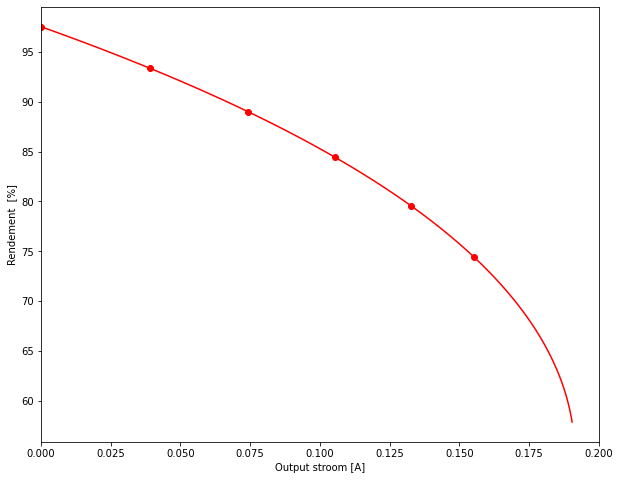

In [29]:
D1=[0.0,0.1,0.2,0.3,0.4,0.5]
A1=[(7.3+0.3*D)/(12.3-3*D) for D in D1]
A2=[100*(1-D)*12/5 for D in A1]
A3=[(1-D)*DD for D,DD in zip(A1,D1)]

D2=[x/100 for x in range(80)]
b1=[(7.3+0.3*D)/(12.3-3*D) for D in D2]
b2=[100*(1-D)*12/5  for D in b1]
b3=[(1-D)*DD for D,DD in zip(b1,D2)]

figure, ax = plt.subplots(figsize=(10, 8))


ax.plot(A3,A2,'ro')
ax.plot(b3,b2,color='r')

ax.set_xlim(0,0.2)
ax.set_xlabel('Output stroom [A]')
ax.set_ylabel('Rendement  [%]')
plt.show()

In [30]:
A1

[0.5934959349593495,
 0.6108333333333333,
 0.6290598290598289,
 0.6482456140350876,
 0.6684684684684684,
 0.6898148148148148]

In [31]:
A2

[97.56097560975613,
 93.4,
 89.02564102564105,
 84.42105263157899,
 79.56756756756758,
 74.44444444444446]

In [32]:
A3

[0.0,
 0.03891666666666667,
 0.07418803418803421,
 0.1055263157894737,
 0.13261261261261265,
 0.15509259259259262]